In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
from lmfit import Model, Parameters
from lmfit.models import ConstantModel
%matplotlib inline

In [22]:
def cavity(x, x_0, I_0, gamma, bg):
    return I_0/(1 + (4*(((x-x_0)/gamma)**2))) + bg

def fit_cavity(freq, trans, trans_err):
    mod = Model(cavity)
    
    #set parameter and make init guess
    p = Parameters()
    p.add('I_0', 1)
    p.add('x_0', 138)
    p.add('gamma', 6)
    p.add('bg', 0.1)
    
    return mod.fit(trans, x=freq ,params=p, weights = 1/(trans_err),method = 'least_squares')

In [23]:
filename = 'cavity_laser_scan.dat'
data = np.genfromtxt(filename)
f_data = data[:,0]
trans = data[:,1]/np.max(data[:,1])
trans_err = data[:,2]/np.max(data[:,1])

fit_result = fit_cavity(f_data,trans,trans_err)

[[Model]]
    Model(cavity)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 6
    # data points      = 42
    # variables        = 4
    chi-square         = 60.3012410
    reduced chi-square = 1.58687476
    Akaike info crit   = 23.1906888
    Bayesian info crit = 30.1413673
[[Variables]]
    I_0:    1.02519988 +/- 0.01546722 (1.51%) (init = 1)
    x_0:    137.764780 +/- 0.03880287 (0.03%) (init = 138)
    gamma:  3.92481417 +/- 0.05064578 (1.29%) (init = 6)
    bg:     3.7073e-04 +/- 3.8460e-04 (103.74%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(I_0, gamma) = -0.678
    C(gamma, bg)  = -0.664
    C(I_0, x_0)   = -0.237
    C(x_0, gamma) = 0.171


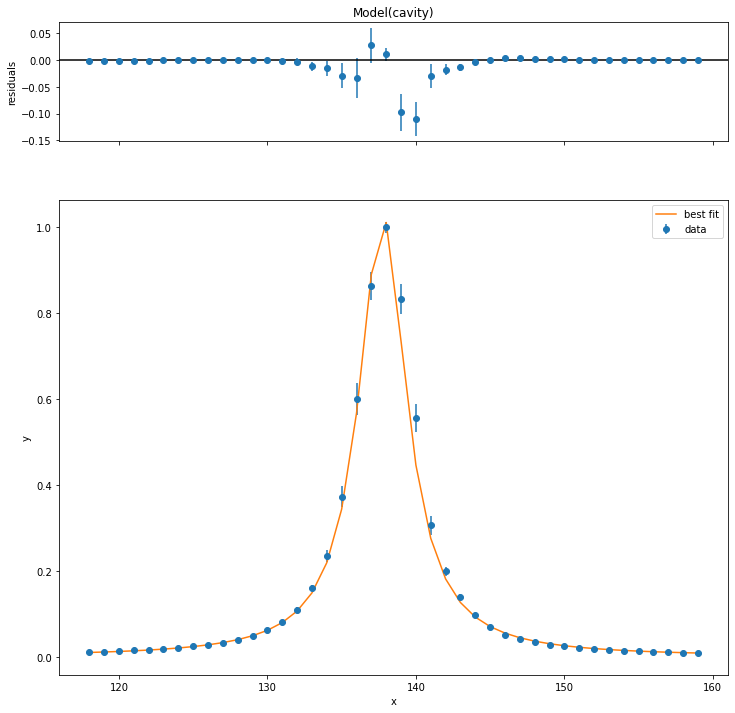

In [24]:
print(fit_result.fit_report())
plt.rcParams["figure.figsize"] = (12,10)
fit_result.plot()
plt.show()

# export simulation result

In [28]:
f_list = np.arange(115,165,0.1)

result_I0 = fit_result.params['I_0'].value
result_x0 = fit_result.params['x_0'].value
result_gamma = fit_result.params['gamma'].value
result_bg = fit_result.params['bg'].value

fit_result = cavity(f_list, result_x0, result_I0, result_gamma, result_bg)

In [29]:
out_text = np.c_[(f_list, fit_result)]
file_name = 'cavity_laser_fit.dat'
np.savetxt(file_name, out_text, delimiter='\t', fmt='%f', header="freq(MHz)\ttransmission")

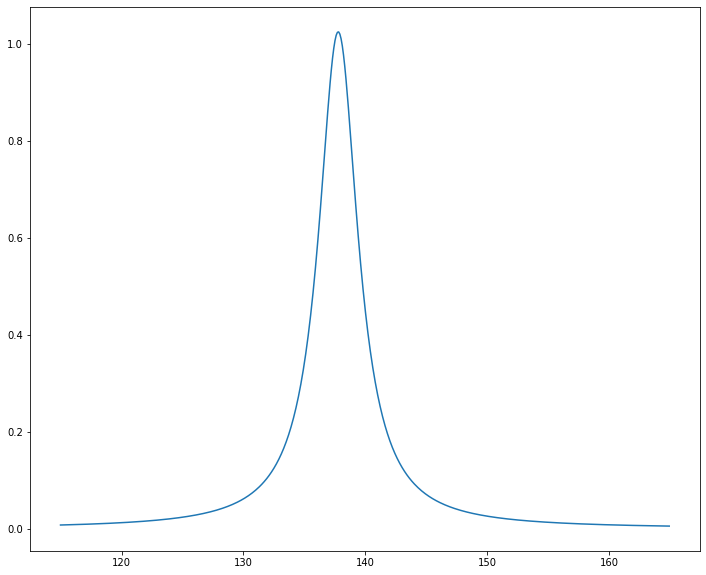

In [30]:
plt.plot(f_list, fit_result)